08/04/2020

Keratinocyte Vocab Finder

In [21]:
# basic packages
import os, glob
import pandas as pd
import numpy as np; np.random.seed(0)
import itertools
from collections import Counter, defaultdict
import time
# Import tools needed for visualization
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt

In [22]:
save_dir = '../data/processed/fig4_modelling/vocab_sum/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [23]:
TISSUE = 'GDSD0'

In [24]:
MAX_DIST=135


In [25]:
#get tfs
tf_df = pd.read_csv('../data/external/transcription_factor_info_063020.csv')
TFS = sorted(set(tf_df[tf_df['cell_type']=='Keratinocytes']["tf"]))##### DIFFERENT FOR EACH TISSUE
print(len(TFS))
print(TFS)


97
['ATF1', 'ATF2', 'ATF3', 'ATF4', 'ATF5', 'BARX2', 'CEBPA', 'CEBPG', 'DLX3', 'DLX5', 'E2F1', 'E2F3', 'E2F4', 'E2F7', 'ELF5', 'ESRRA', 'ETS1', 'ETV4', 'FOS', 'FOSL1', 'FOSL2', 'FOXF2', 'FOXK2', 'FOXP1', 'GRHL1', 'GRHL2', 'HES1', 'HES2', 'HOMEZ', 'HOXA1', 'HOXC11', 'HOXC13', 'ID3', 'IRX2', 'IRX4', 'JUN', 'JUNB', 'JUND', 'KER2', 'KLF16', 'KLF4', 'KLF5', 'LDB2', 'MAF', 'MAFB', 'MAML3', 'NR3C1', 'OTX1', 'OVOL1', 'PBX1', 'PBX2', 'POU1F1', 'POU2F1', 'POU2F2', 'POU2F3', 'POU3F1', 'POU3F2', 'POU3F3', 'POU3F4', 'POU4F1', 'POU4F2', 'POU4F3', 'POU5F1', 'POU5F1B', 'POU6F1', 'POU6F2', 'PRDM1', 'PRRX1', 'RARG', 'RELB', 'RORA', 'RUNX1', 'SMAD4', 'SOX11', 'SOX15', 'SOX6', 'SOX7', 'SOX9', 'SP1', 'SP3', 'STAT1', 'STAT6', 'TCF4', 'TCF7L2', 'TFAP2A', 'TFAP2B', 'TFAP2C', 'TFAP2D', 'TFDP1', 'TP63', 'TWIST2', 'VDR', 'VGLL1', 'XBP1', 'ZBTB7B', 'ZEB1', 'ZNF219']


In [26]:
vocab_dir = '../data/processed/fig4_modelling/tf_tf_pairs/'

read in loop_types

In [27]:
glob.glob('../data/processed/fig4_modelling/tf_tf_pairs/'+'*loop_type*')

['../data/processed/fig4_modelling/tf_tf_pairs/expr_Astrocytes_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_GM12878_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Thyroid_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD0_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/unique_Astrocytes_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Esophageal_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/unique_HMEC_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/unique_Esophageal_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Prostate_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Colon_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/unique_Ovarian_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Airway_loop_type.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/unique_Uterine_loop_type.csv

# 1 understand the types of vocabularies pulled out and where they come from

## 1A. enriched vocabularies from unique tissue genes

In [28]:
# loop_type_df = pd.read_csv('../data/processed/fig4_modelling/tf_tf_pairs/unique_'+TISSUE+'_loop_type.csv',index_col=0).fillna('')
# pro_pro_vocab = loop_type_df[(loop_type_df.pro_pro_count>0) & (loop_type_df.loop_loop_count==0) & (loop_type_df.pro_loop_count==0)].index.values
# print(len(pro_pro_vocab))
# print(pro_pro_vocab)
# pro_loop_vocab = loop_type_df[(loop_type_df.pro_pro_count==0) & (loop_type_df.loop_loop_count==0) & (loop_type_df.pro_loop_count>0)].index.values
# print(len(pro_loop_vocab))
# print(pro_loop_vocab)

# loop_loop_vocab = loop_type_df[(loop_type_df.pro_pro_count==0) & (loop_type_df.loop_loop_count>0) & (loop_type_df.pro_loop_count==0)].index.values
# print(len(loop_loop_vocab))
# print(loop_loop_vocab)

# all_vocab = loop_type_df[(loop_type_df.pro_pro_count>0) & (loop_type_df.loop_loop_count>0) & (loop_type_df.pro_loop_count>0)].index.values
# print(len(all_vocab))
# print(all_vocab)


## 1b enriched vocab from expressed genes in KRT

In [29]:
loop_type_df = pd.read_csv('../data/processed/fig4_modelling/tf_tf_pairs/expr_'+TISSUE+'_loop_type.csv',index_col=0).fillna('')
pro_pro_vocab = loop_type_df[(loop_type_df.pro_pro_count>0) & (loop_type_df.loop_loop_count==0) & (loop_type_df.pro_loop_count==0)].index.values
print(len(pro_pro_vocab))
print(pro_pro_vocab)
pro_loop_vocab = loop_type_df[(loop_type_df.pro_pro_count==0) & (loop_type_df.loop_loop_count==0) & (loop_type_df.pro_loop_count>0)].index.values
print(len(pro_loop_vocab))
print(pro_loop_vocab)

loop_loop_vocab = loop_type_df[(loop_type_df.pro_pro_count==0) & (loop_type_df.loop_loop_count>0) & (loop_type_df.pro_loop_count==0)].index.values
print(len(loop_loop_vocab))
print(loop_loop_vocab)

all_vocab = loop_type_df[(loop_type_df.pro_pro_count>0) & (loop_type_df.loop_loop_count>0) & (loop_type_df.pro_loop_count>0)].index.values
print(len(all_vocab))
print(all_vocab)


0
[]
0
[]
322
['ARID3A::HINFP' 'ATF2::SOX11' 'ATF4::DLX1' 'ATF4::HES7' 'ATF4::HINFP'
 'ATF4::SOX11' 'ATF4::TEF' 'ATF7::DLX1' 'ATF7::HES7' 'ATF7::HINFP'
 'ATF7::MECOM' 'ATF7::POU3F1' 'ATF7::SOX11' 'ATF7::STAT6' 'ATF7::ZNF232'
 'ATF7::ZNF274' 'BACH2::HINFP' 'BACH2::HMBOX1' 'BACH2::ZNF274'
 'BCL6::HES7' 'BCL6::HINFP' 'BCL6::ZNF502' 'BHLHE41::CREB5'
 'BHLHE41::DLX2' 'BHLHE41::ETV3' 'BHLHE41::HOXC11' 'BHLHE41::ISL1'
 'BHLHE41::OSR2' 'BHLHE41::PITX2' 'BHLHE41::POU3F1' 'BHLHE41::SREBF2'
 'BHLHE41::ZFP42' 'BHLHE41::ZNF143' 'BHLHE41::ZNF250' 'CEBPG::HINFP'
 'CEBPG::SOX11' 'CREB5::DLX1' 'CREB5::HINFP' 'CREB5::MECOM'
 'CREB5::POU3F1' 'CREB5::SOX11' 'CREB5::ZNF232' 'CREB5::ZNF274'
 'DDIT3::HINFP' 'DDIT3::SOX11' 'DLX1::GRHL2' 'DLX1::HINFP' 'DLX1::ISL1'
 'DLX1::ZNF143' 'DLX1::ZNF274' 'DLX2::HINFP' 'DLX2::HMBOX1' 'DLX2::MITF'
 'DLX2::ZNF274' 'DLX2::ZNF354A' 'DLX2::ZNF85' 'DLX3::ETV1' 'DLX3::HES7'
 'DLX3::MITF' 'DLX3::POU3F1' 'DLX3::RFX5' 'DLX3::SOX11' 'DLX3::ZFP42'
 'DLX3::ZNF18' 'DLX3::ZNF502' 'DLX3

## 1C get motif appearance locations (normalized)

In [30]:
# for vocab pairs
pro_frac = ((loop_type_df.pro_pro_count+1)/(loop_type_df.pro_pro_count.sum()+1))
loop_frac = ((loop_type_df.loop_loop_count+1)/(loop_type_df.loop_loop_count.sum()+1))
ratio = pro_frac/loop_frac
ratio.sort_values()

LEF1::NFIA         0.234834
NFIC::PBX1         0.332681
PRDM1::ZNF449      0.368508
GMEB2::SREBF2      0.388427
SREBF1::ZNF449     0.427733
                    ...    
HINFP::OVOL1      35.929542
DLX3::HES7        35.929542
DLX3::HINFP       35.929542
HINFP::HOXA7      35.929542
HINFP::ZNF232     71.859084
Length: 1310, dtype: float64

In [31]:
# for motifs
# 1. get motifs
motifs = set()
for vocab_pair in loop_type_df.index.values:
    v1, v2 = vocab_pair.split('::')
    motifs.add(v1)
    motifs.add(v2)
motifs = sorted(motifs)
print(len(motifs))

# 2. initialize counts
motif_counts_dict = {}
for motif in motifs:
    motif_counts_dict[motif] = {'pro_pro_count':0,'loop_loop_count':0,'pro_loop_count':0} #list of counts for pro_pro_count, loop_loop_count, pro_loop_count, respectively
    
# 3. run through loop_type_df to fill in motif_counts_dict
for vocab_pair, row in loop_type_df.iterrows():
    v1, v2 = vocab_pair.split('::')
    motif_counts_dict[v1]['pro_pro_count'] +=row['pro_pro_count']
    motif_counts_dict[v2]['pro_pro_count'] +=row['pro_pro_count']
    motif_counts_dict[v1]['loop_loop_count'] +=row['loop_loop_count']
    motif_counts_dict[v2]['loop_loop_count'] +=row['loop_loop_count']
    motif_counts_dict[v1]['pro_loop_count'] +=row['pro_loop_count']
    motif_counts_dict[v2]['pro_loop_count'] +=row['pro_loop_count']
            
motif_counts_df = pd.DataFrame.from_dict(motif_counts_dict,orient='index')   
motif_counts_df_norm = motif_counts_df/motif_counts_df.sum(axis=0)


136


In [32]:
motif_counts_df_norm_sel = motif_counts_df_norm.reset_index()[motif_counts_df_norm.reset_index()['index'].isin(TFS)]
motif_counts_df_norm_sel.set_index('index',inplace=True)

In [33]:
motif_counts_df_norm.div(motif_counts_df_norm.sum(axis=1),axis=0)

,pro_pro_count,loop_loop_count,pro_loop_count
ARID3A,0.446730,0.352034,0.201236
ARID5B,0.375987,0.230232,0.393781
ATF2,0.477343,0.224929,0.297728
ATF4,0.389931,0.293900,0.316169
ATF7,0.399362,0.254420,0.346218
...,...,...,...
ZNF554,0.276371,0.430176,0.293453
ZNF563,0.382692,0.268220,0.349087
ZNF768,0.184872,0.377920,0.437209
ZNF816,0.307810,0.334996,0.357193


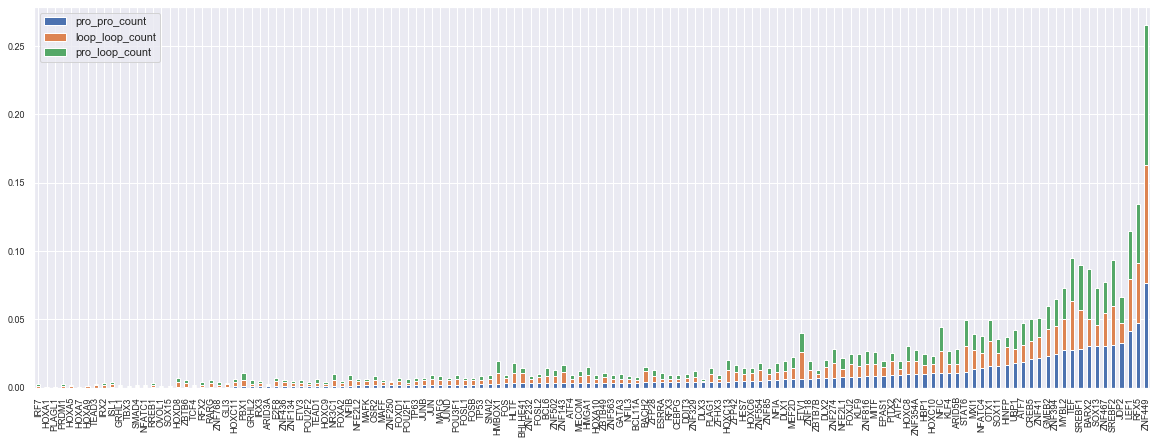

In [34]:
# all tfs
ax = motif_counts_df_norm.sort_values('pro_pro_count').plot(kind='bar', stacked=True,figsize = (20,7),fontsize=9)
ax.figure.savefig(os.path.join(save_dir, TISSUE+'_config_count_bar.pdf'))


this shows the likelihood of the motif appears in a vocab pair from pro_pro, pro_loop, or loop_loop configurations, GIVEN that it does appear at all (so normalized by both the probability of the configuration type)

this will show frequency of footprints being found in the looped regions 

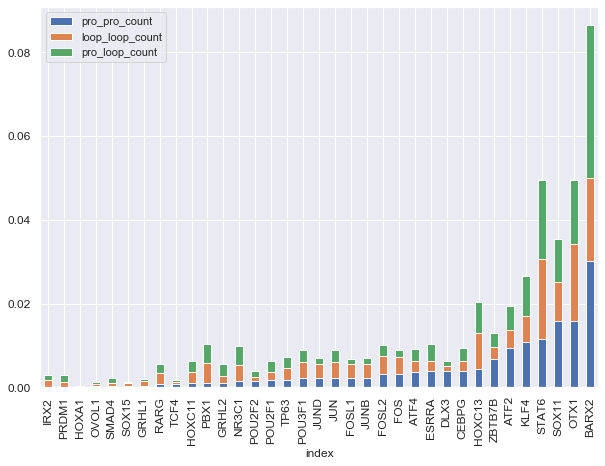

In [35]:
ax = motif_counts_df_norm_sel.sort_values('pro_pro_count').plot(kind='bar', stacked=True,figsize = (10,7),fontsize=12)
ax.figure.savefig(os.path.join(save_dir, TISSUE+'_config_count_sel_bar.pdf'))


same graph as before but only for tissue specific TFS

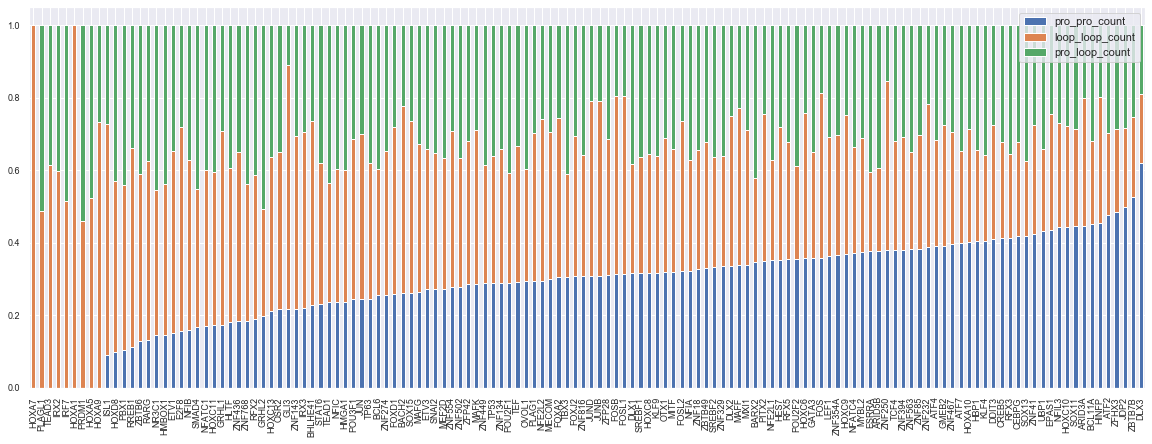

In [36]:
ax = motif_counts_df_norm.div(motif_counts_df_norm.sum(axis=1),axis=0).sort_values('pro_pro_count').plot(kind='bar', stacked=True,
                                                                                                    figsize = (20,7),fontsize=9)
ax.figure.savefig(os.path.join(save_dir, TISSUE+'_config_count_norm_bar.pdf'))


this shows the likelihood of the motif appears in a vocab pair from pro_pro, pro_loop, or loop_loop configurations, GIVEN that it does appear at all (so normalized by both the probability of the configuration type as well as by the motif frequency itself

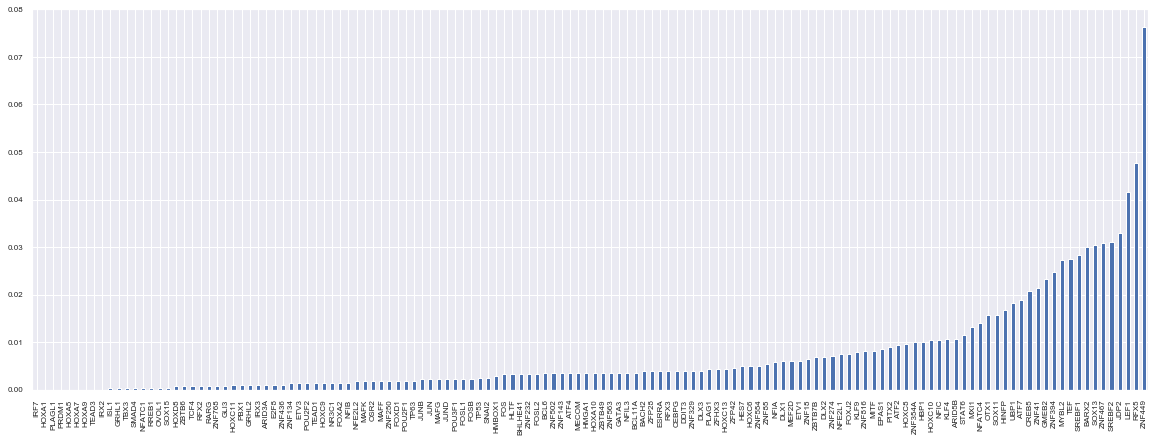

In [37]:
# fig,ax= plt.subplots(figsize = (20,7))
# ax.set_xlabel('xlabel', fontsize=6)

ax = motif_counts_df_norm.pro_pro_count.sort_values().plot(kind='bar',figsize = (20,7),fontsize=8)

ax.figure.savefig(os.path.join(save_dir, TISSUE+'_pro_count_norm_bar.pdf'))


only the promoter fractions

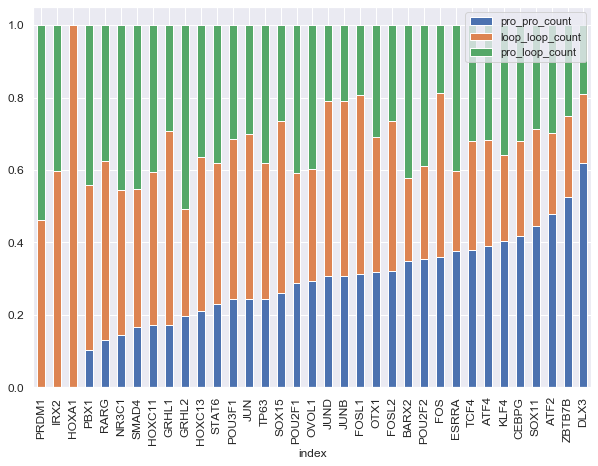

In [38]:
ax = motif_counts_df_norm_sel.div(motif_counts_df_norm_sel.sum(axis=1),axis=0).sort_values('pro_pro_count').plot(kind='bar', stacked=True,
                                                                                                    figsize = (10,7),fontsize=12)
ax.figure.savefig(os.path.join(save_dir, TISSUE+'_config_count_norm_sel_bar.pdf'))


In [39]:
motif_counts_df.div(motif_counts_df.sum(axis=1),axis=0)

,pro_pro_count,loop_loop_count,pro_loop_count
ARID3A,0.016949,0.960452,0.022599
ARID5B,0.020776,0.914820,0.064404
ATF2,0.027225,0.922513,0.050262
ATF4,0.017361,0.940972,0.041667
ATF7,0.020252,0.927780,0.051968
...,...,...,...
ZNF554,0.008615,0.964308,0.027077
ZNF563,0.018484,0.931608,0.049908
ZNF768,0.006452,0.948387,0.045161
ZNF816,0.012093,0.946372,0.041535


# 2. Vocabulary genomic instances - setup


## 2A. find the locations

In [40]:
# sorted(glob.glob('../data/processed/fig4_modelling/tf_tf_pairs_stability/'+'*vocab*'))

In [41]:
sorted(glob.glob(vocab_dir+'*vocab*'))

['../data/processed/fig4_modelling/tf_tf_pairs/expr_Airway_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Airway_pro_pro_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Astrocytes_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Astrocytes_pro_pro_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Bladder_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Bladder_pro_pro_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Colon_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Colon_pro_pro_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Esophageal_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_Esophageal_pro_pro_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD0_loop_loop_vocab_info.csv',
 '../data/processed/fig4_modelling/tf_tf_pairs/ex

## 2B helper functions

In [42]:
def get_other_vocab_word(row, next_row):
    if row['vocab']!=next_row['vocab']:
        return False
    
    vocab_word = set(row['tf'])
    vocab_set = set(row['vocab'].split('::'))
    other_vocab = list(vocab_set -  vocab_word)[0]
    return other_vocab == next_row['tf']

def check_distance(row,next_row,max_dist=MAX_DIST):
    if row['chr_m']==next_row['chr_m']:
        if row['stop_m']<next_row['start_m']:
            tot_dist = next_row['stop_m'] - row['start_m']
            btn_dist = next_row['start_m'] - row['stop_m']
            return (tot_dist < max_dist), tot_dist, btn_dist
    return False,-1,-1

def check_tissue(row,next_row,tfs=TFS):
    if (row['tf'] in tfs) & (next_row['tf'] in tfs):
        return 'both'
    elif (row['tf'] in tfs) | (next_row['tf'] in tfs):
        return 'one'    
    else:
        return 'none'
    
def get_hits(vocab_file,tfs=TFS):
    print('**** reading', vocab_file)
    vocab_df = pd.read_csv(vocab_file)
    print(vocab_df.shape)
    idx = 0
    idx_hits = 0
    results_dict = {}
    while idx < (vocab_df.shape[0]-1):
        # look at next 
        row = vocab_df.iloc[idx,:]
        next_row = vocab_df.iloc[idx+1,:]

        check_vocab_pair = get_other_vocab_word(row,next_row)
        check_dist,tot_dist, btn_dist = check_distance(row, next_row)
        check_tissue_tf = check_tissue(row,next_row,tfs)
        if (check_dist and check_vocab_pair):
    #         print('hi',idx)
    #         print(row)
    #         print(next_row)

            results_dict[idx_hits] = {'vocab_pair':row['vocab'],'tot_dist':tot_dist,'btn_dist':btn_dist,
                                      'chr':row['chr'],'start':row['start_m'],'stop':next_row['stop_m'], 
                                      'vocab1':row['tf'],'vocab1_start':row['start_m'], 'vocab1_stop': row['stop_m'],
                                      'vocab2':next_row['tf'],'vocab2_start':next_row['start_m'], 'vocab2_stop': next_row['stop_m'],
                                      'genes':row['genes'],'num_genes':len(row['genes'].split('|')), 'tissue':row['tissue'],
                                     'check_tissuetf':check_tissue_tf}
            idx_hits+=1

        idx+=1
    print('num_hits',idx_hits)
    results_df = pd.DataFrame.from_dict(results_dict, orient='index')
    return results_df
    
def filter_results(results_df,min_hits_per_vocab=10):
    print('shape', results_df.shape)
    vocab_counts = results_df.vocab_pair.value_counts()
    print('original num vocab',vocab_counts.shape[0])
    vocab_to_include = vocab_counts[vocab_counts>min_hits_per_vocab].index.values
    print('filt num vocab',vocab_to_include.shape[0])
    
    results_df_filt = results_df[results_df.vocab_pair.isin(vocab_to_include)]
    return results_df_filt

    

# 3. Vocabulary genomic instances - running

## 3A get expression and stability for loop-loop regions

In [23]:
# ###TESTING PURPOSES
# vocab_df = pd.read_csv('../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD6_pro_pro_vocab_info.csv')
# print(vocab_df.shape)
# vocab_df[:5]

In [43]:
%%time
# filtered so that at least 10 genomic instances of vocab pair in significantly found in expressed genes 
results_expr_pro_pro = get_hits('../data/processed/fig4_modelling/tf_tf_pairs/expr_'+TISSUE+'_pro_pro_vocab_info.csv')



**** reading ../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD0_pro_pro_vocab_info.csv
(6252, 15)
num_hits 1061
CPU times: user 2.44 s, sys: 6.5 ms, total: 2.45 s
Wall time: 2.45 s


In [44]:
%%time
### TAKES AWHILE
results_expr_loop_loop = get_hits('../data/processed/fig4_modelling/tf_tf_pairs/expr_'+TISSUE+'_loop_loop_vocab_info.csv')


**** reading ../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD0_loop_loop_vocab_info.csv
(39851, 15)
num_hits 4973
CPU times: user 16.2 s, sys: 60.8 ms, total: 16.2 s
Wall time: 16.3 s


## 3B raw statistics (pre genomic instance filter)

In [45]:
motifs_pro_pro = sorted(set(list(results_expr_pro_pro.vocab1.unique())+list(results_expr_pro_pro.vocab2.unique())))
print('num motifs in pro_pro', len(motifs_pro_pro))
print(motifs_pro_pro)


motifs_loop_loop = sorted(set(list(results_expr_loop_loop.vocab1.unique())+list(results_expr_loop_loop.vocab2.unique())))
print('num motifs in loop_loop', len(motifs_loop_loop))
print(motifs_loop_loop)

num motifs in pro_pro 111
['ARID3A', 'ARID5B', 'ATF2', 'ATF7', 'BACH2', 'BARX2', 'BCL11A', 'BCL6', 'BHLHE41', 'CREB5', 'DDIT3', 'DLX1', 'DLX2', 'DLX3', 'E2F8', 'EPAS1', 'ESRRA', 'ETV1', 'ETV3', 'FOS', 'FOSB', 'FOSL1', 'FOSL2', 'FOXJ2', 'GATA3', 'GMEB2', 'HBP1', 'HES7', 'HINFP', 'HLTF', 'HMBOX1', 'HMGA1', 'HOXA10', 'HOXC10', 'HOXC11', 'HOXC13', 'HOXC6', 'HOXC8', 'HOXC9', 'IRX3', 'JDP2', 'JUN', 'JUNB', 'JUND', 'KLF4', 'KLF9', 'LEF1', 'MAFF', 'MAFG', 'MAFK', 'MECOM', 'MEF2D', 'MITF', 'MXI1', 'MYBL2', 'NFATC1', 'NFATC4', 'NFE2L1', 'NFE2L2', 'NFIA', 'NFIB', 'NFIC', 'NR3C1', 'OSR2', 'OTX1', 'OVOL1', 'PBX1', 'PITX2', 'PLAG1', 'POU2F1', 'POU2F2', 'POU3F1', 'RFX2', 'RFX3', 'RFX5', 'SNAI2', 'SOX11', 'SOX13', 'SREBF1', 'SREBF2', 'STAT6', 'TBX3', 'TCF4', 'TEAD1', 'TEF', 'TP53', 'TP63', 'UBP1', 'ZBTB49', 'ZBTB6', 'ZBTB7B', 'ZFHX3', 'ZFP28', 'ZFP42', 'ZNF143', 'ZNF18', 'ZNF232', 'ZNF250', 'ZNF274', 'ZNF329', 'ZNF354A', 'ZNF394', 'ZNF41', 'ZNF449', 'ZNF467', 'ZNF502', 'ZNF554', 'ZNF563', 'ZNF768', 'Z

In [46]:
print('pre genomic instance filter')
print('num vocab in expression enrichment (pro-pro region): ', results_expr_pro_pro.vocab_pair.unique().shape[0])
# print('num vocab in expression enrichment intersected with stability (pro-pro region): ', results_stability_pro_pro.vocab_pair.unique().shape[0])
# print(results_stability_pro_pro.vocab_pair.unique())
print('num vocab in expression enrichment (loop-loop region): ', results_expr_loop_loop.vocab_pair.unique().shape[0])
# print('num vocab in expression enrichment intersected with stability (loop-loop region): ', results_stability_loop_loop.vocab_pair.unique().shape[0])
# print(results_stability_loop_loop.vocab_pair.unique())


pre genomic instance filter
num vocab in expression enrichment (pro-pro region):  292
num vocab in expression enrichment (loop-loop region):  565


## 3C. filter expression enriched vocab words if then have at least 10 genomic instances then get stats

In [47]:
results_expr_pro_pro = filter_results(results_expr_pro_pro,min_hits_per_vocab=10)
# print(results_expr_pro_pro.vocab_pair.unique().shape)
# results_expr_pro_pro.vocab_pair.unique()

shape (1061, 16)
original num vocab 292
filt num vocab 20


In [48]:
results_expr_loop_loop = filter_results(results_expr_loop_loop,min_hits_per_vocab=10)
# print(results_expr_loop_loop.vocab_pair.unique().shape)
# results_expr_loop_loop.vocab_pair.unique()

shape (4973, 16)
original num vocab 565
filt num vocab 69


In [49]:
# results_stability_pro_pro = filter_results(results_stability_pro_pro,min_hits_per_vocab=10)
# results_stability_loop_loop = filter_results(results_stability_loop_loop,min_hits_per_vocab=10)


In [51]:
print('post genomic instance filter')
print('num vocab in expression enrichment (pro-pro region): ', results_expr_pro_pro.vocab_pair.unique().shape[0])
# print('num vocab in expression enrichment intersected with stability (pro-pro region): ', results_stability_pro_pro.vocab_pair.unique().shape[0])
print(results_expr_pro_pro.vocab_pair.unique())
print('num vocab in expression enrichment (loop-loop region): ', results_expr_loop_loop.vocab_pair.unique().shape[0])
# print('num vocab in expression enrichment intersected with stability (loop-loop region): ', results_stability_loop_loop.vocab_pair.unique().shape[0])
print(results_expr_loop_loop.vocab_pair.unique())


post genomic instance filter
num vocab in expression enrichment (pro-pro region):  20
['ARID5B::RFX5' 'ARID5B::SOX11' 'CREB5::SOX13' 'GMEB2::NFATC4'
 'GMEB2::ZNF467' 'KLF4::ZNF41' 'LEF1::SOX13' 'MYBL2::ZNF467'
 'NFATC4::STAT6' 'NFIA::SOX11' 'NFIC::ZNF816' 'RFX5::SOX13' 'RFX5::UBP1'
 'RFX5::ZNF467' 'SOX13::SREBF2' 'SOX13::TEF' 'SOX13::ZNF449' 'TEF::UBP1'
 'UBP1::ZNF449' 'ZNF449::ZNF467']
num vocab in expression enrichment (loop-loop region):  69
['ARID5B::RFX5' 'ARID5B::SOX11' 'ARID5B::ZNF449' 'ATF7::SOX13'
 'BARX2::LEF1' 'BARX2::ZNF394' 'CREB5::SOX13' 'FOS::ZNF449'
 'FOSL2::ZNF449' 'FOXJ2::ZNF467' 'GMEB2::KLF9' 'GMEB2::NFATC4'
 'GMEB2::PLAG1' 'GMEB2::ZNF467' 'HINFP::NFATC4' 'HINFP::SOX13'
 'HINFP::UBP1' 'HLTF::PLAG1' 'HMGA1::RFX5' 'HMGA1::TEF' 'HMGA1::ZNF449'
 'KLF4::LEF1' 'KLF4::ZNF41' 'KLF4::ZNF449' 'KLF9::MEF2D' 'KLF9::SREBF1'
 'KLF9::STAT6' 'KLF9::ZNF274' 'LEF1::SOX13' 'MECOM::NFATC4'
 'MEF2D::ZNF467' 'MITF::ZNF467' 'MXI1::NFATC4' 'MYBL2::RFX5'
 'MYBL2::ZNF449' 'MYBL2::ZNF467' 'MYB

## 3D filter expr vocab words based on whether there is they are annotated for skin

In [52]:
results_expr_pro_pro[['vocab_pair','check_tissuetf']].drop_duplicates().check_tissuetf.value_counts()

none    19
one      3
both     1
Name: check_tissuetf, dtype: int64

In [53]:
results_expr_loop_loop[['vocab_pair','check_tissuetf']].drop_duplicates().check_tissuetf.value_counts()

none    61
one     14
both     7
Name: check_tissuetf, dtype: int64

shows fraction of vocab words having tissue specific motif configuration (`both` are tissue specific, `one` is tissue specific, or `none` are)


MAKE SURE #s are around 40 ish so pick `one` or `both`

In [54]:
filter_thres = ['none']#'both' # 'one'#'none','one',
results_expr_pro_pro_tissue = results_expr_pro_pro[results_expr_pro_pro.check_tissuetf.isin(filter_thres)]
print('pro-pro region')
print('total vocab:',results_expr_pro_pro.vocab_pair.unique().shape[0],'tissue annon vocab:', results_expr_pro_pro_tissue.vocab_pair.unique().shape[0])
print(results_expr_pro_pro_tissue.vocab_pair.unique())

results_expr_loop_loop_tissue = results_expr_loop_loop[results_expr_loop_loop.check_tissuetf.isin(filter_thres)]
print('loop-loop region')
print('total vocab:',results_expr_loop_loop.vocab_pair.unique().shape[0],'tissue annon vocab:', results_expr_loop_loop_tissue.vocab_pair.unique().shape[0])
print(results_expr_loop_loop_tissue.vocab_pair.unique())

pro-pro region
total vocab: 20 tissue annon vocab: 19
['ARID5B::RFX5' 'ARID5B::SOX11' 'CREB5::SOX13' 'GMEB2::NFATC4'
 'GMEB2::ZNF467' 'LEF1::SOX13' 'MYBL2::ZNF467' 'NFATC4::STAT6'
 'NFIA::SOX11' 'NFIC::ZNF816' 'RFX5::SOX13' 'RFX5::UBP1' 'RFX5::ZNF467'
 'SOX13::SREBF2' 'SOX13::TEF' 'SOX13::ZNF449' 'TEF::UBP1' 'UBP1::ZNF449'
 'ZNF449::ZNF467']
loop-loop region
total vocab: 69 tissue annon vocab: 61
['ARID5B::RFX5' 'ARID5B::SOX11' 'ARID5B::ZNF449' 'ATF7::SOX13'
 'BARX2::ZNF394' 'CREB5::SOX13' 'FOXJ2::ZNF467' 'GMEB2::KLF9'
 'GMEB2::NFATC4' 'GMEB2::PLAG1' 'GMEB2::ZNF467' 'HINFP::NFATC4'
 'HINFP::SOX13' 'HINFP::UBP1' 'HLTF::PLAG1' 'HMGA1::RFX5' 'HMGA1::TEF'
 'HMGA1::ZNF449' 'KLF9::MEF2D' 'KLF9::SREBF1' 'KLF9::STAT6' 'KLF9::ZNF274'
 'LEF1::SOX13' 'MECOM::NFATC4' 'MEF2D::ZNF467' 'MITF::ZNF467'
 'MXI1::NFATC4' 'MYBL2::RFX5' 'MYBL2::ZNF449' 'MYBL2::ZNF467'
 'MYBL2::ZNF554' 'NFATC4::SREBF1' 'NFATC4::STAT6' 'NFATC4::TEF'
 'NFATC4::ZNF274' 'NFE2L1::ZNF449' 'NFIA::ZNF449' 'NFIC::RFX5'
 'NFIC::ZNF41'

## 3E add in stability scores vocab pairs that pass the genomic instance filter and get genomic instance counts

In [55]:
def get_counts(results_df, label):
    counts_df = pd.DataFrame(results_df.vocab_pair.value_counts())
    counts_df.columns = ['num_instance']
    counts_df['label']=label
    return counts_df

In [57]:
vocab_summary_df = pd.concat([# get_counts(results_stability_pro_pro, 'stability_pro'),
            get_counts(results_expr_pro_pro_tissue, 'expr_pro_tissue'),
#             get_counts(results_stability_loop_loop, 'stability_loop'),
            get_counts(results_expr_loop_loop_tissue, 'expr_loop_tissue')],axis=0)
vocab_summary_df.index.set_names('vocab',inplace=True)
vocab_summary_df.reset_index(inplace=True)
vocab_summary_df = vocab_summary_df.groupby('vocab').agg({'num_instance':sum, 'label':'|'.join}).reset_index()
vocab_summary_df['tissue']=TISSUE
vocab_summary_df.label.value_counts()
# results_stability_loop_loop.vocab_pair.unique()

expr_loop_tissue                    43
expr_pro_tissue|expr_loop_tissue    18
expr_pro_tissue                      1
Name: label, dtype: int64

In [58]:
vocab_summary_df.to_csv(os.path.join(save_dir, TISSUE+'_vocab_summary.csv'))